 <div style="border-radius: 10px; border: 2px solid #8B4513; padding: 15px; background-color: #FAF3E3; font-size: 16px; text-align: center; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
      <h2 style="font-family: 'Arial', sans-serif; color: #8B4513; text-transform: uppercase; letter-spacing: 1px;">Part -3 Air Quality Data Analysis</h2>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 

In [2]:
Air_quality=pd.read_csv("Air_quality_new (1).xls")

In [3]:
Air_quality.head()

,Unnamed: 0,date_time,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,...,hour,quarter,day_of_week_num,day_of_week_name,time_until_2022,time_until_2022_days,time_until_2022_weeks,prior_2016_ind,PM2.5_category,TEMP_category
0,0,2013-03-01 00:00:00,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,...,0,1,4,Friday,3228 days 00:00:00,3228.000000,461.142857,True,Good,Very Cold
1,1,2013-03-01 01:00:00,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,...,1,1,4,Friday,3227 days 23:00:00,3227.958333,461.136905,True,Good,Very Cold
2,2,2013-03-01 05:00:00,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,...,5,1,4,Friday,3227 days 19:00:00,3227.791667,461.113095,True,Good,Very Cold
3,3,2013-03-01 06:00:00,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,...,6,1,4,Friday,3227 days 18:00:00,3227.750000,461.107143,True,Good,Very Cold
4,4,2013-03-01 07:00:00,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,...,7,1,4,Friday,3227 days 17:00:00,3227.708333,461.101190,True,Good,Very Cold


In [4]:
Air_quality.columns

Index(['Unnamed: 0', 'date_time', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
       'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'year',
       'month', 'day', 'hour', 'quarter', 'day_of_week_num',
       'day_of_week_name', 'time_until_2022', 'time_until_2022_days',
       'time_until_2022_weeks', 'prior_2016_ind', 'PM2.5_category',
       'TEMP_category'],
      dtype='object')

In [5]:
Air_quality[['TEMP','PM2.5','PRES']].describe()

,TEMP,PM2.5,PRES
count,95685.000000,95685.000000,95685.000000
mean,13.729446,83.477884,1011.397848
std,11.320713,82.678134,10.287210
min,-16.800000,2.000000,984.000000
25%,3.500000,23.000000,1003.000000
50%,14.600000,59.000000,1011.000000
75%,23.400000,116.000000,1019.600000
max,41.600000,821.000000,1042.000000


## Visualizations

## representation of 3 columns using histogram 

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>, <Axes: >]], dtype=object)

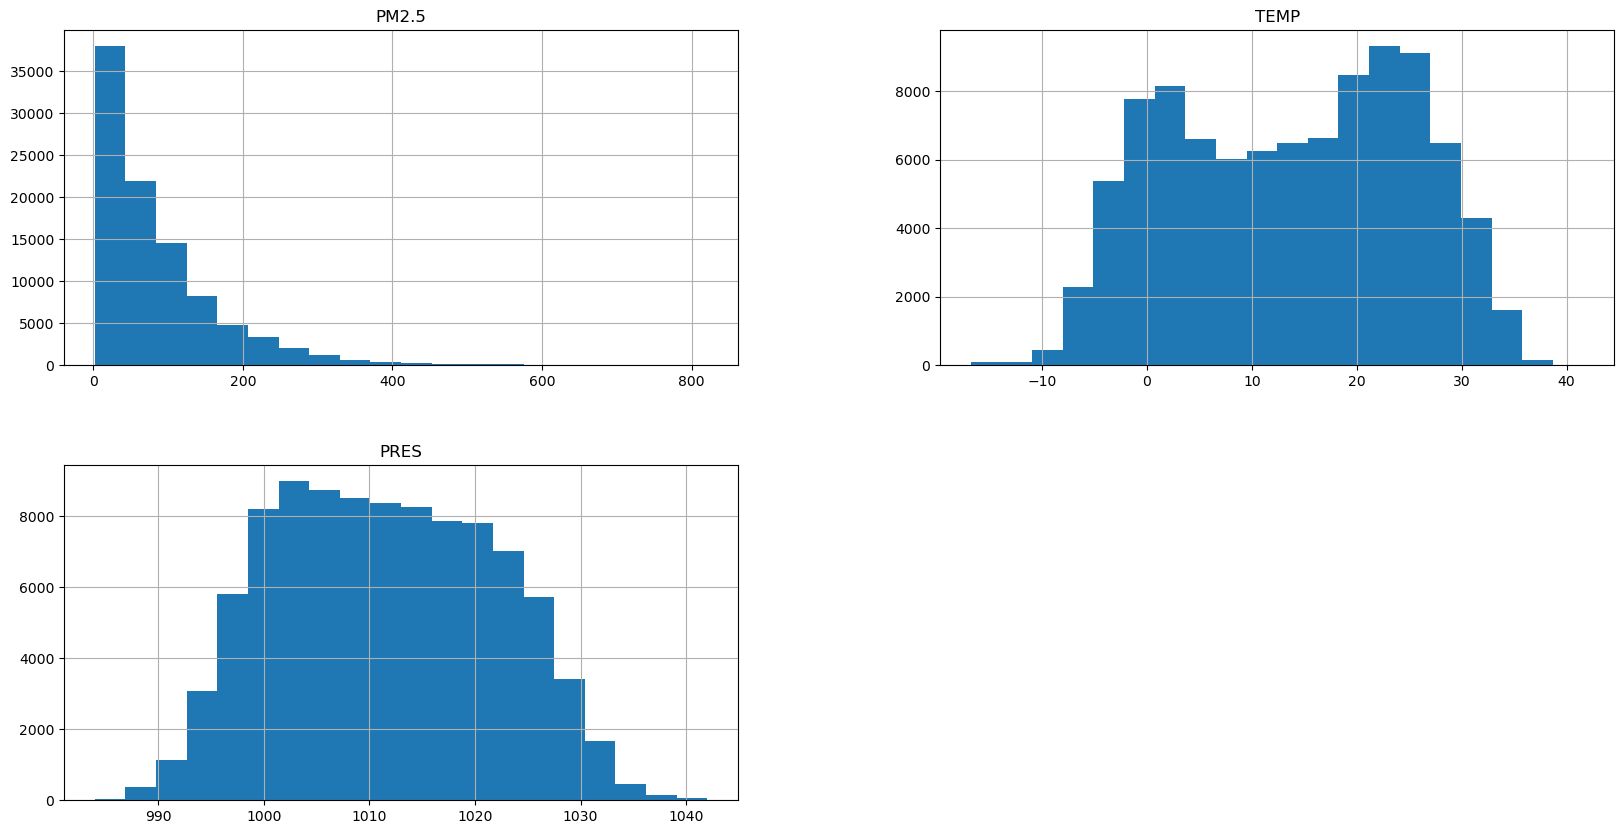

In [6]:
Air_quality[['PM2.5','TEMP','PRES']].hist(figsize=(20,10),bins=20)

## Checking the outliers in the data using the Boxplot

<Axes: >

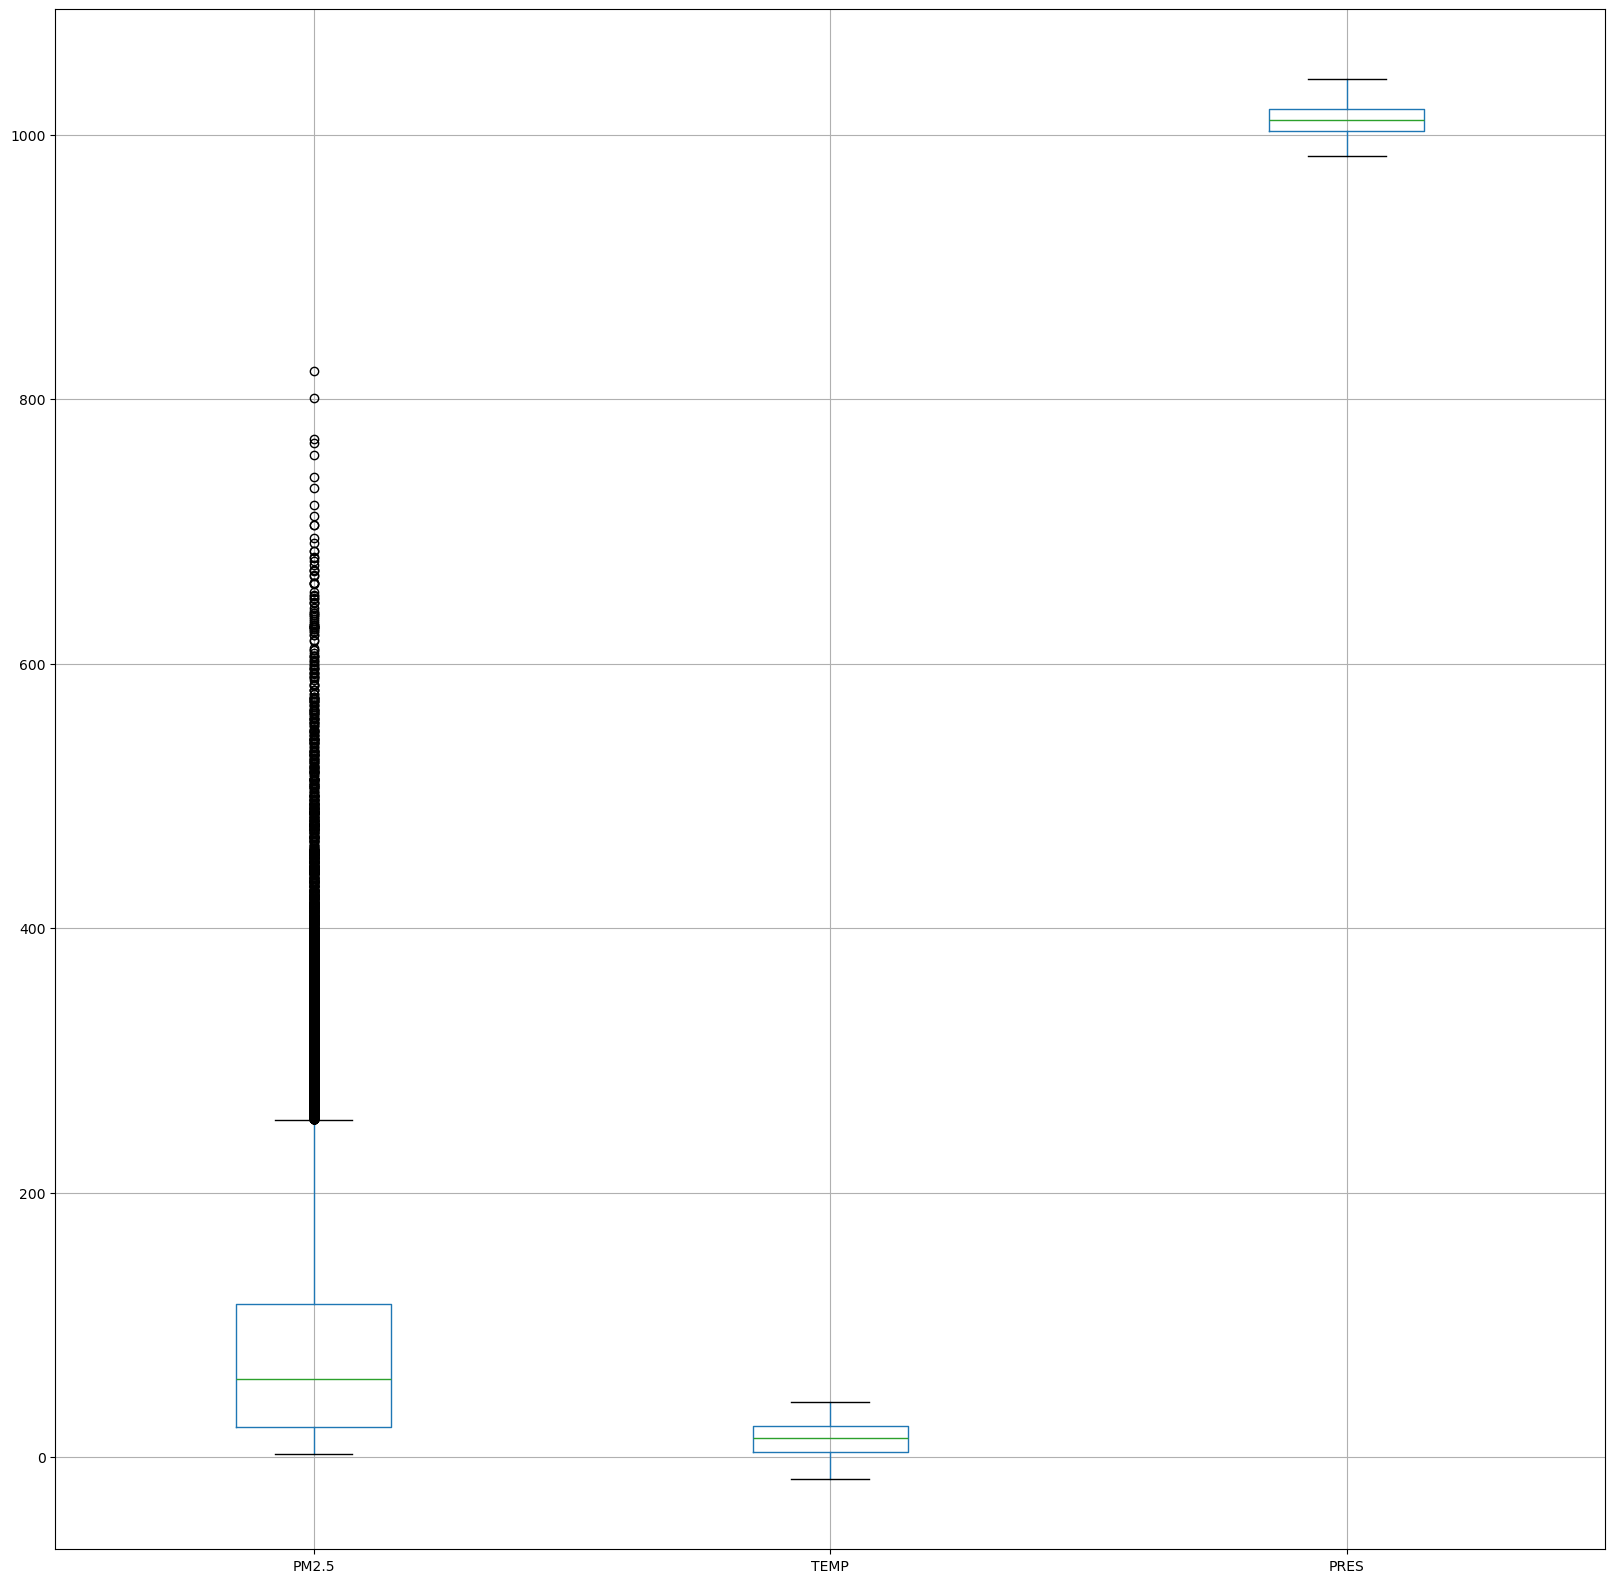

In [7]:
Air_quality[['PM2.5','TEMP','PRES']].boxplot(figsize=(20,20))

## Kernal Density Estimation 

<Axes: ylabel='Density'>

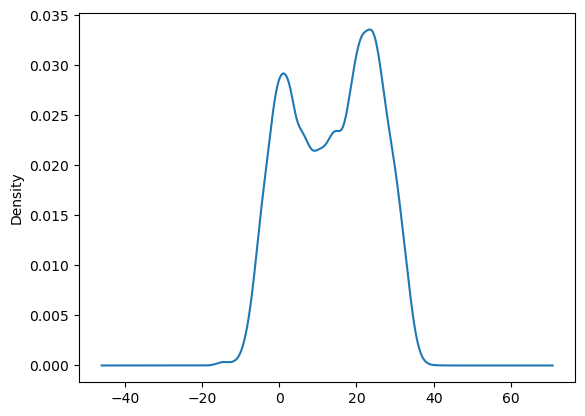

In [8]:
Air_quality['TEMP'].plot(kind='kde') #we can change kind like bar,line,box,hist kernel density estimation 

<Axes: ylabel='Frequency'>

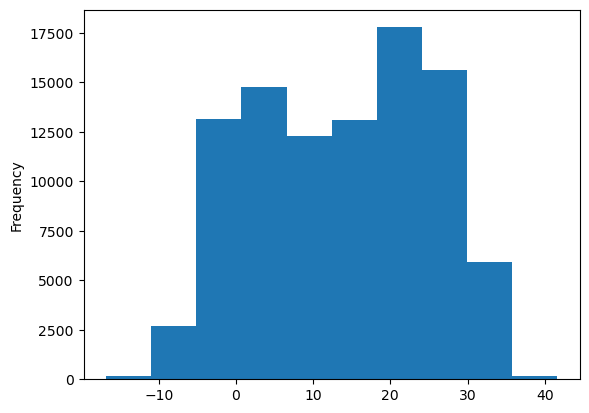

In [9]:
Air_quality['TEMP'].plot(kind='hist')

In [10]:
cat_cols=Air_quality.select_dtypes(include=['object','category','bool']).columns
cat_cols

Index(['date_time', 'wd', 'station', 'day_of_week_name', 'time_until_2022',
       'prior_2016_ind', 'PM2.5_category', 'TEMP_category'],
      dtype='object')

In [11]:
for col in cat_cols:
    print(Air_quality[col].value_counts())
    print()

date_time
2015-05-14 06:00:00    3
2015-10-04 13:00:00    3
2015-10-05 00:00:00    3
2015-10-04 23:00:00    3
2015-10-04 22:00:00    3
                      ..
2013-10-21 17:00:00    1
2013-10-21 18:00:00    1
2013-10-21 21:00:00    1
2013-10-21 22:00:00    1
2017-01-04 01:00:00    1
Name: count, Length: 34618, dtype: int64

wd
NE     9447
ENE    8744
E      7848
NW     7124
N      6962
SW     6410
ESE    6107
SSW    6103
NNE    5930
S      4939
WSW    4686
SE     4651
NNW    4605
WNW    4324
SSE    3951
W      3854
Name: count, dtype: int64

station
Tiantan    32843
Gucheng    32504
Dongsi     30338
Name: count, dtype: int64

day_of_week_name
Sunday       13931
Saturday     13812
Friday       13782
Thursday     13633
Monday       13536
Tuesday      13523
Wednesday    13468
Name: count, dtype: int64

time_until_2022
2423 days 18:00:00    3
2280 days 11:00:00    3
2280 days 00:00:00    3
2280 days 01:00:00    3
2280 days 02:00:00    3
                     ..
2993 days 07:00:00    1
2993

In [12]:
Air_quality['date_time'].dtype

dtype('O')

In [13]:
Air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95685 entries, 0 to 95684
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             95685 non-null  int64  
 1   date_time              95685 non-null  object 
 2   PM2.5                  95685 non-null  float64
 3   PM10                   95685 non-null  float64
 4   SO2                    95685 non-null  float64
 5   NO2                    95685 non-null  float64
 6   CO                     95685 non-null  float64
 7   O3                     95685 non-null  float64
 8   TEMP                   95685 non-null  float64
 9   PRES                   95685 non-null  float64
 10  DEWP                   95685 non-null  float64
 11  RAIN                   95685 non-null  float64
 12  wd                     95685 non-null  object 
 13  WSPM                   95685 non-null  float64
 14  station                95685 non-null  object 
 15  ye

## Showing the PM2.5 category using the Bar chart 

<Axes: ylabel='PM2.5_category'>

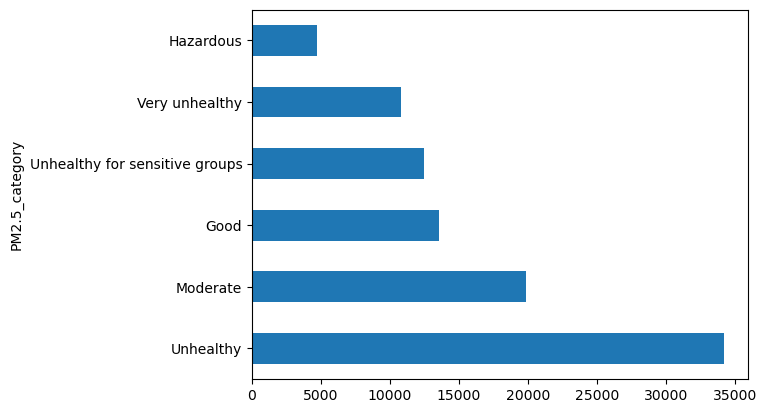

In [14]:
Air_quality['PM2.5_category'].value_counts().plot(kind='barh') #use h with bar to see horizontally 

<Axes: ylabel='TEMP_category'>

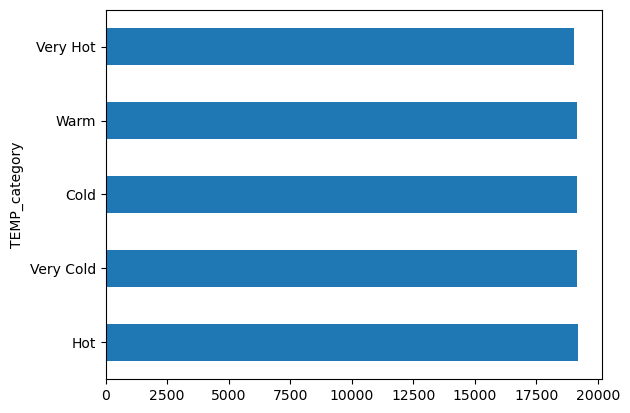

In [15]:
Air_quality['TEMP_category'].value_counts().plot(kind='barh')

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


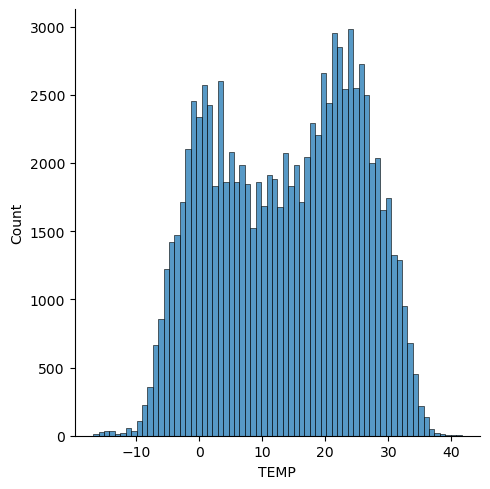

In [16]:
sns.displot(data=Air_quality, x='TEMP')  #distribution chart 

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


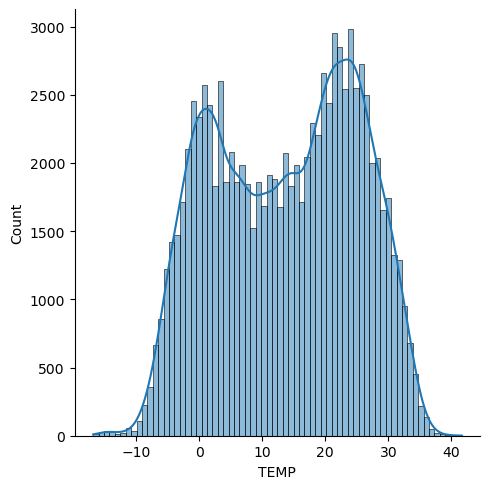

In [17]:
sns.displot(data=Air_quality, x='TEMP', kde=True)

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


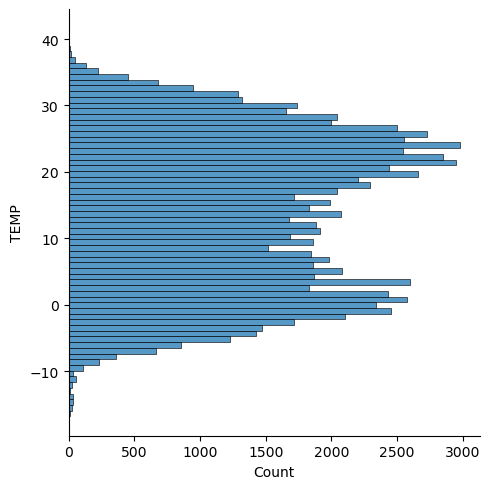

In [18]:
sns.displot(data=Air_quality, y='TEMP')  #use y axis if you want it horizontally 

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


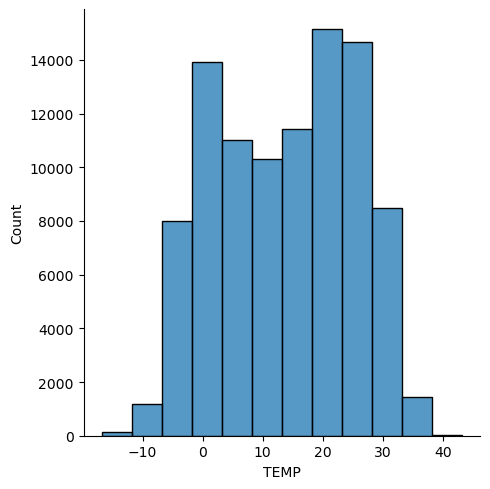

In [19]:
sns.displot(data=Air_quality, x='TEMP', binwidth=5)

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


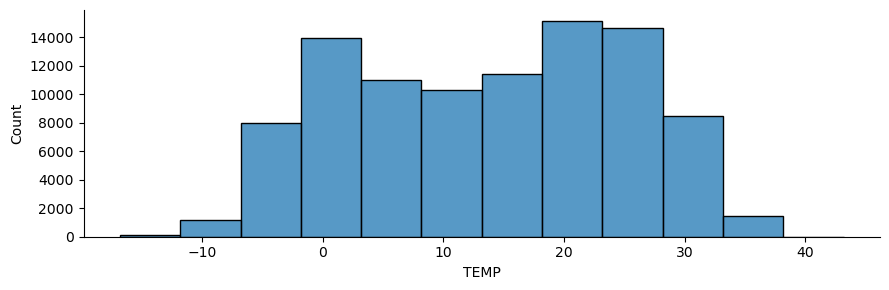

In [20]:
sns.displot(data=Air_quality, x='TEMP', binwidth=5, height=3, aspect=3)

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


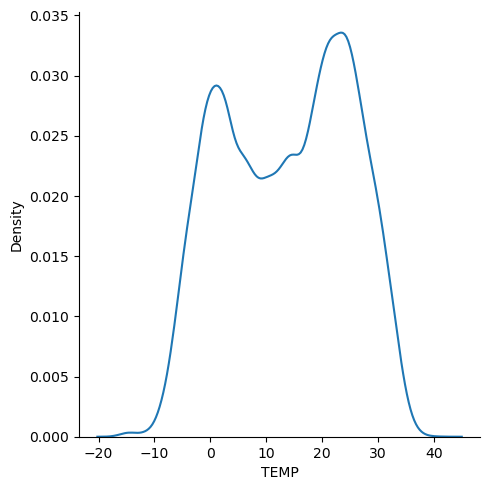

In [21]:
sns.displot(data=Air_quality, x='TEMP', kind='kde')

<Axes: ylabel='TEMP'>

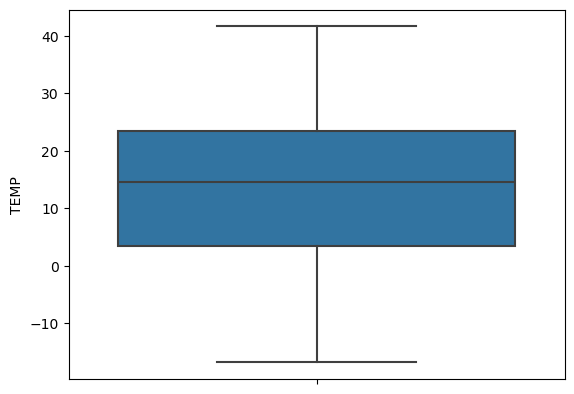

In [23]:
sns.boxplot(y=Air_quality["TEMP"]) 

<Axes: xlabel='count', ylabel='PM2.5_category'>

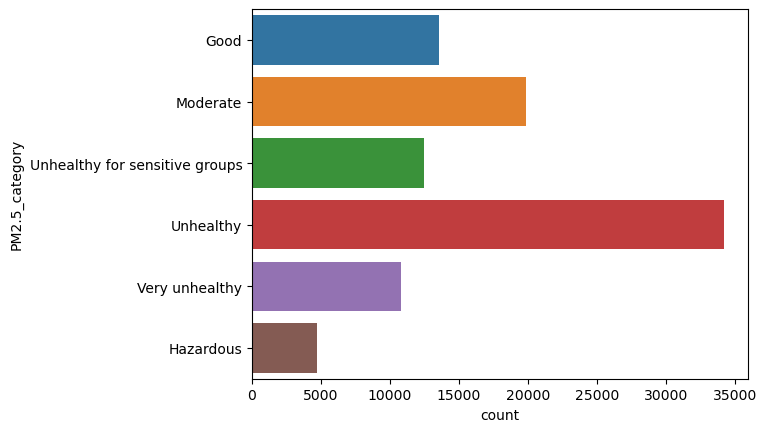

In [26]:
sns.countplot(data=Air_quality, y="PM2.5_category")

In [27]:
Air_quality["PM2.5_category"].value_counts()

PM2.5_category
Unhealthy                         34257
Moderate                          19853
Good                              13576
Unhealthy for sensitive groups    12457
Very unhealthy                    10821
Hazardous                          4721
Name: count, dtype: int64

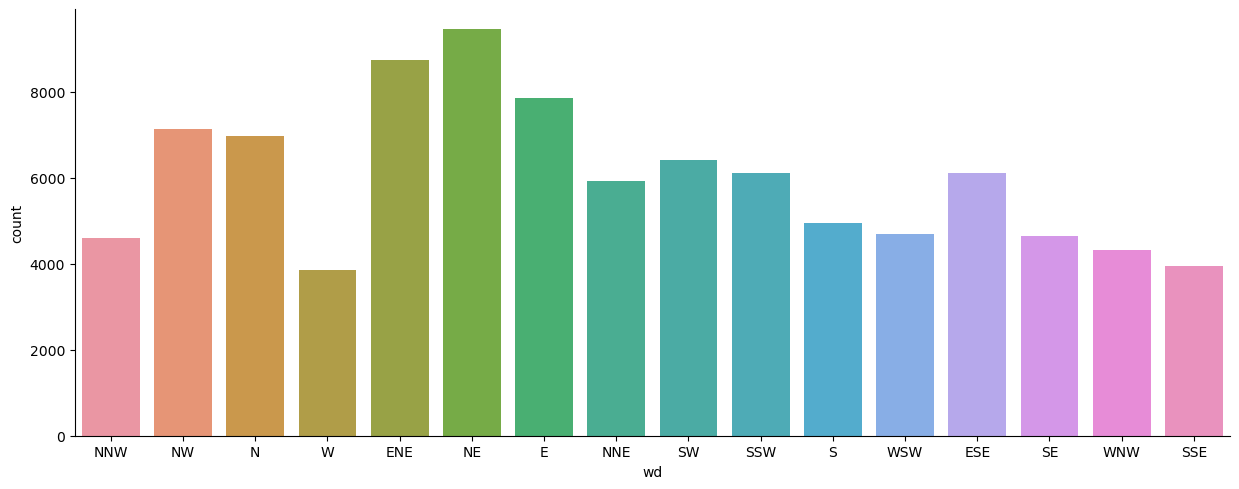

In [28]:
sns.catplot(data=Air_quality, x="wd", kind="count", aspect=2.5)

## Relationship of two feature using the Scatterplot  

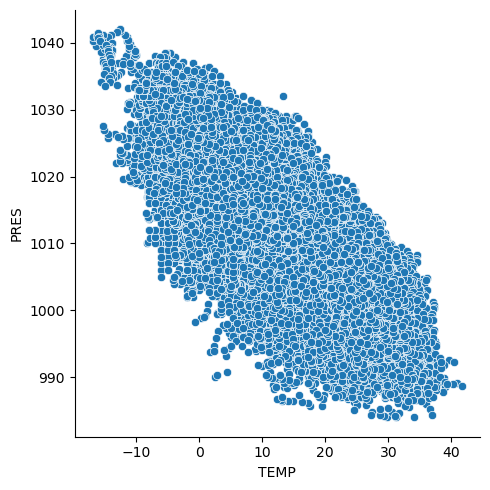

In [31]:
sns.relplot(data=Air_quality, x="TEMP",y="PRES",kind="scatter")

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


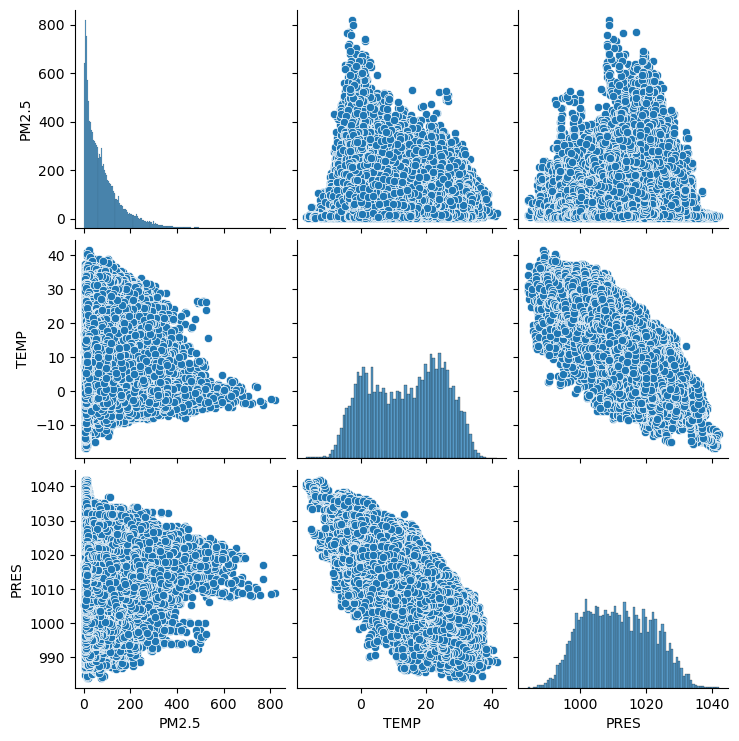

In [37]:
sns.pairplot(data=Air_quality[['PM2.5','TEMP','PRES']])

## Jointplot presenting the two Features 

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


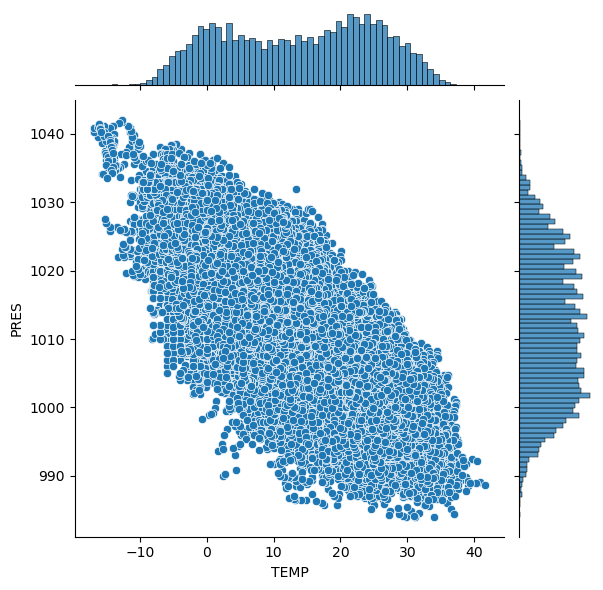

In [38]:
sns.jointplot(data=Air_quality, x="TEMP", y="PRES")

## Correlation in the data 

In [40]:
Air_quality.corr(numeric_only =True)

,Unnamed: 0,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,...,WSPM,year,month,day,hour,quarter,day_of_week_num,time_until_2022_days,time_until_2022_weeks,prior_2016_ind
Unnamed: 0,1.000000,-0.017659,-0.032533,-0.123731,-0.023053,-0.002702,-0.032146,-0.046435,0.052630,-0.028868,...,0.025935,0.285526,0.017208,0.003219,-0.000454,0.020744,-0.000581,-0.295359,-0.295359,-0.253667
PM2.5,-0.017659,1.000000,0.877604,0.467973,0.686860,0.790248,-0.165957,-0.143648,0.002185,0.118003,...,-0.280859,-0.017029,0.033400,0.002226,0.015258,0.033416,0.038922,0.008754,0.008754,0.027716
PM10,-0.032533,0.877604,1.000000,0.437132,0.659912,0.690456,-0.128705,-0.105337,-0.045728,0.073583,...,-0.199898,-0.027686,0.001895,0.023612,0.054251,-0.000690,0.041351,0.027194,0.027194,0.036129
SO2,-0.123731,0.467973,0.437132,1.000000,0.476830,0.525300,-0.135873,-0.316335,0.205264,-0.265499,...,-0.091946,-0.150932,-0.224877,-0.006782,0.037478,-0.240256,0.012845,0.210387,0.210387,0.131449
NO2,-0.023053,0.686860,0.659912,0.476830,1.000000,0.714467,-0.505391,-0.278953,0.116887,-0.004038,...,-0.443135,-0.069235,0.075911,0.011302,-0.031735,0.071653,0.016531,0.050935,0.050935,0.044694
CO,-0.002702,0.790248,0.690456,0.525300,0.714467,1.000000,-0.327016,-0.342622,0.168770,-0.059313,...,-0.310547,-0.004323,0.060340,-0.019017,-0.034256,0.046706,0.023984,-0.010681,-0.010681,0.020992
O3,-0.032146,-0.165957,-0.128705,-0.135873,-0.505391,-0.327016,1.000000,0.591782,-0.440404,0.298988,...,0.295376,-0.035246,-0.111426,-0.004285,0.290982,-0.115090,0.003291,0.064377,0.064377,0.032250
TEMP,-0.046435,-0.143648,-0.105337,-0.316335,-0.278953,-0.342622,0.591782,1.000000,-0.821269,0.817228,...,0.014796,-0.170546,0.146007,0.010736,0.140933,0.148816,0.006211,0.137239,0.137239,0.113493
PRES,0.052630,0.002185,-0.045728,0.205264,0.116887,0.168770,-0.440404,-0.821269,1.000000,-0.756744,...,0.101385,0.174126,-0.022875,0.020630,-0.038507,-0.020546,-0.008231,-0.172698,-0.172698,-0.111909
DEWP,-0.028868,0.118003,0.073583,-0.265499,-0.004038,-0.059313,0.298988,0.817228,-0.756744,1.000000,...,-0.305391,-0.172337,0.289416,0.020178,-0.018068,0.297986,0.012567,0.102595,0.102595,0.125191


C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


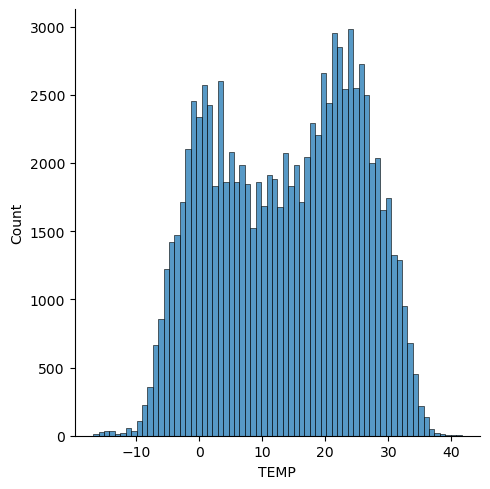

In [41]:
sns.displot(data=Air_quality, x="TEMP")

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


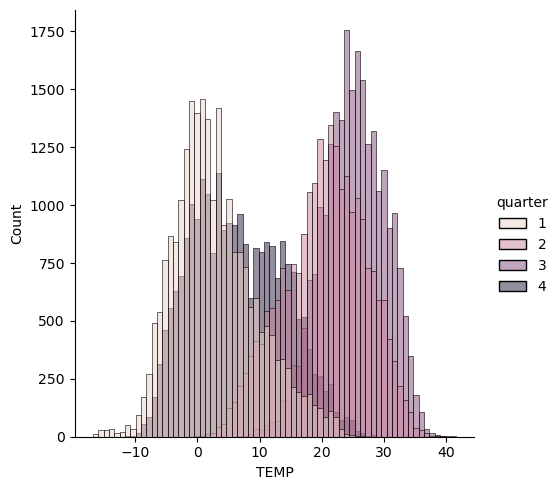

In [42]:
sns.displot(data=Air_quality, x="TEMP", hue="quarter")

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


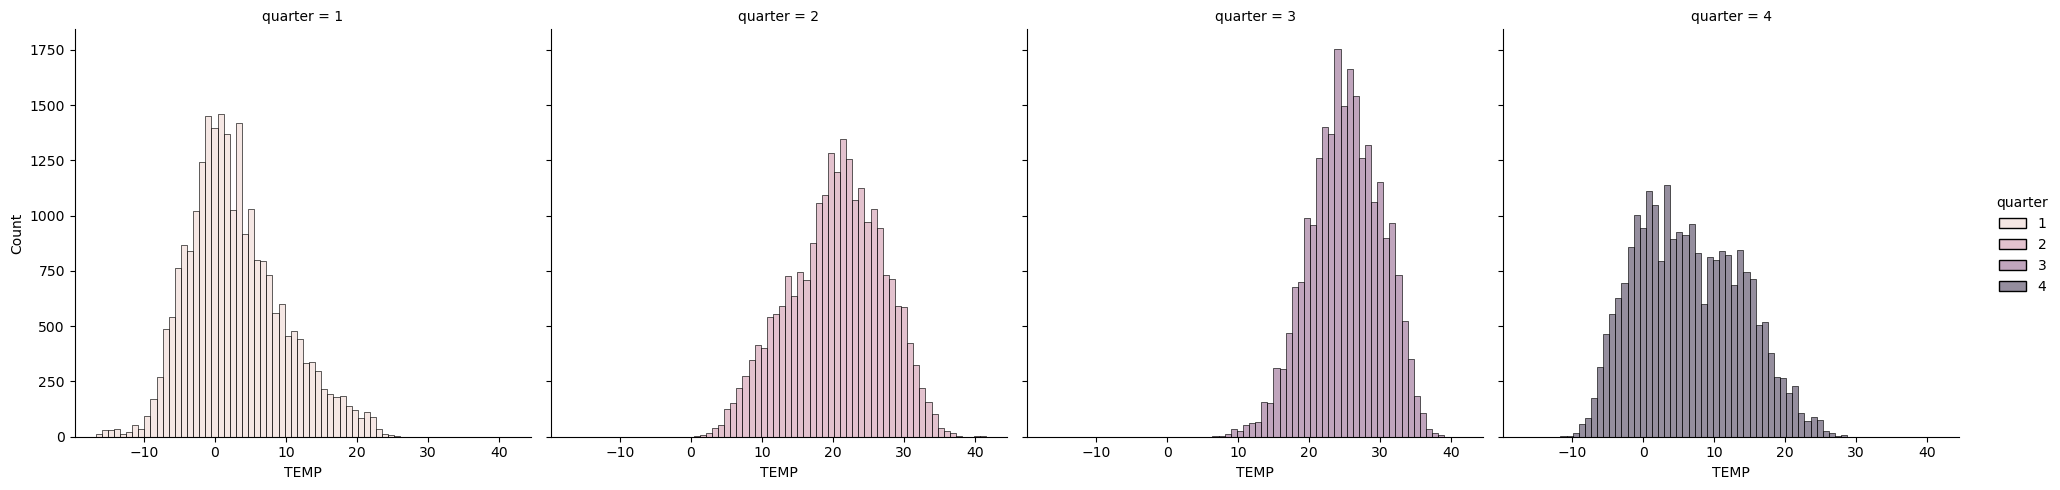

In [43]:
sns.displot(data=Air_quality, x="TEMP", hue="quarter", col="quarter")

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


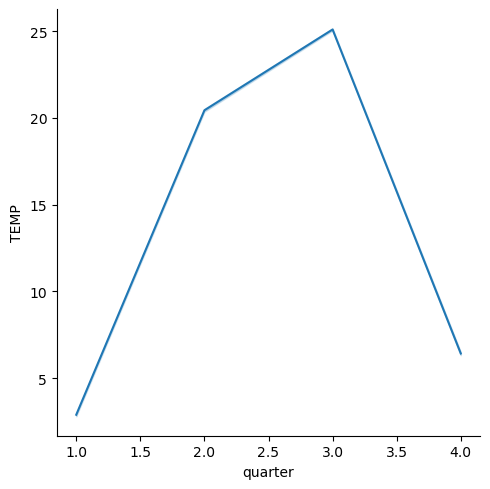

In [45]:
sns.relplot(data=Air_quality, x="quarter",y="TEMP", kind="line")

In [46]:
Air_quality.groupby('quarter')['TEMP'].mean()

quarter
1     2.899613
2    20.437886
3    25.092483
4     6.427893
Name: TEMP, dtype: float64

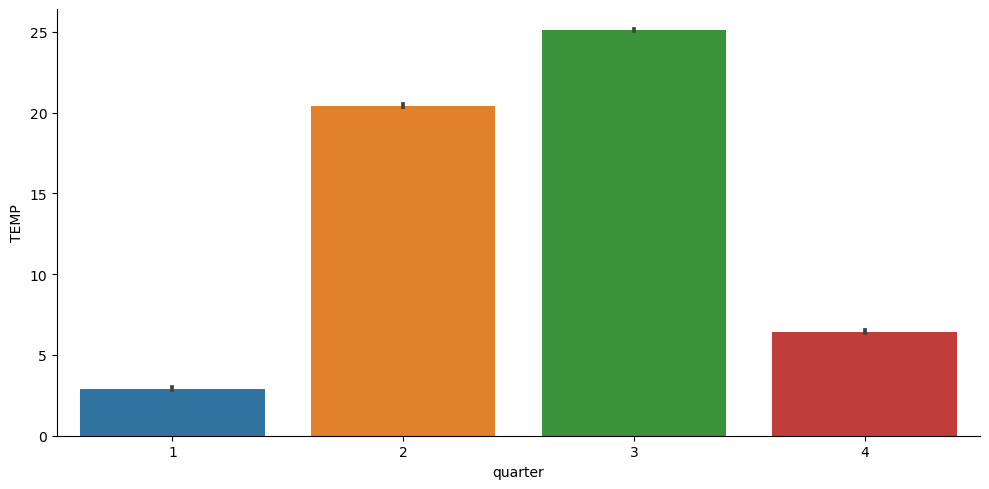

In [50]:
sns.catplot(data=Air_quality, x='quarter',y='TEMP', kind='bar', aspect=2)

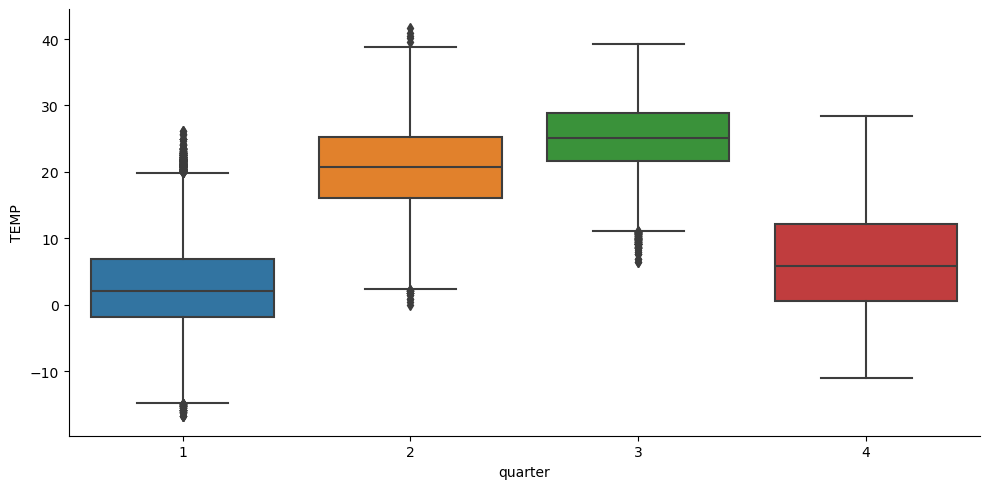

In [51]:
sns.catplot(data=Air_quality, x='quarter',y='TEMP', kind='box', aspect=2)

## Boxen plot 

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

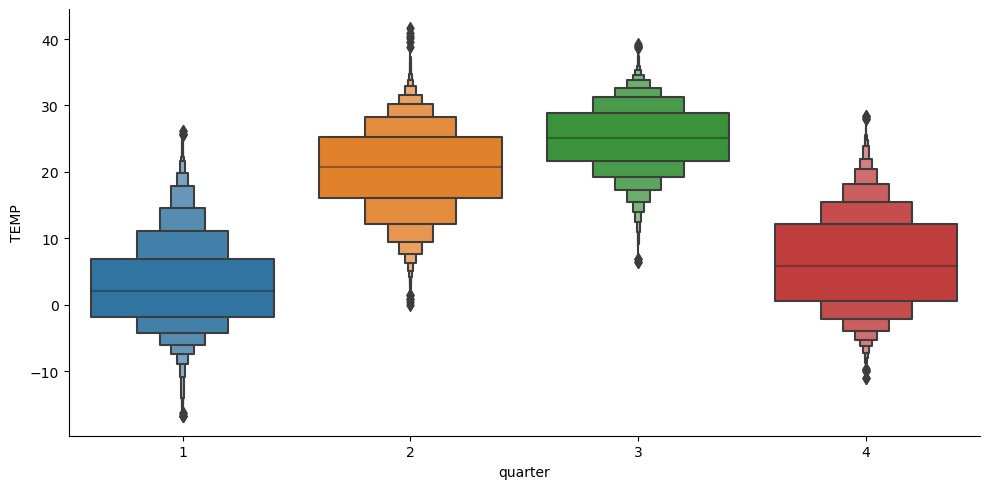

In [52]:
sns.catplot(data=Air_quality, x='quarter',y='TEMP', kind='boxen', aspect=2)

## Strip plot

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


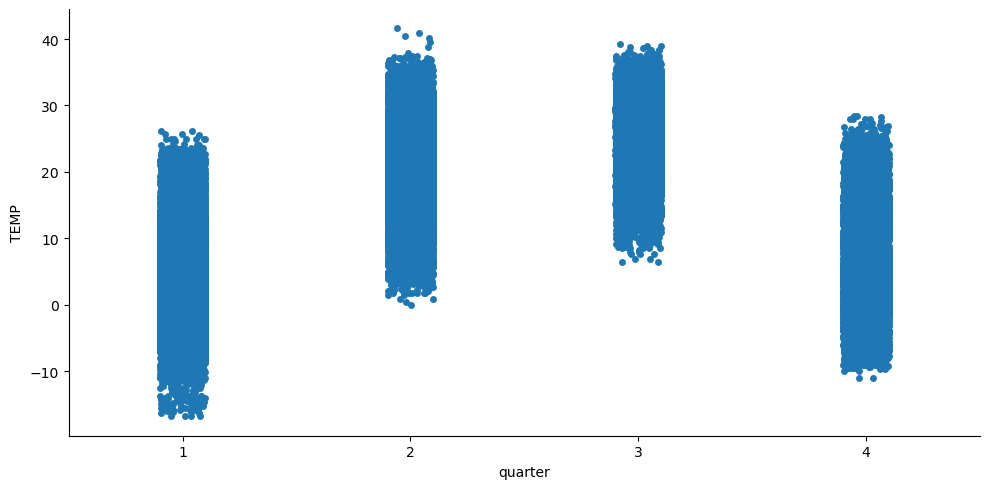

In [53]:
sns.catplot(data=Air_quality, x='quarter', y='TEMP', kind='strip', aspect=2)

C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minni\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


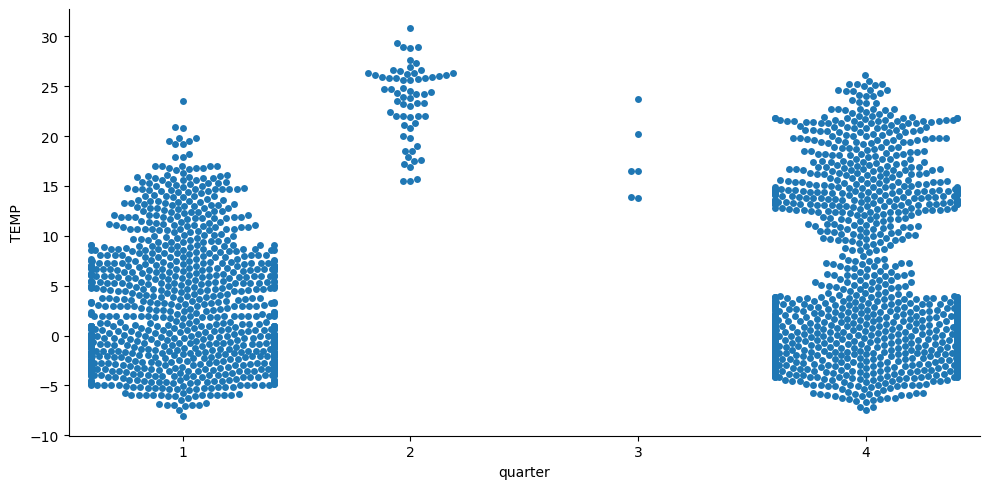

In [55]:
sns.catplot(data=Air_quality[Air_quality['PM2.5']>300], x='quarter', y='TEMP', kind='swarm', aspect=2)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

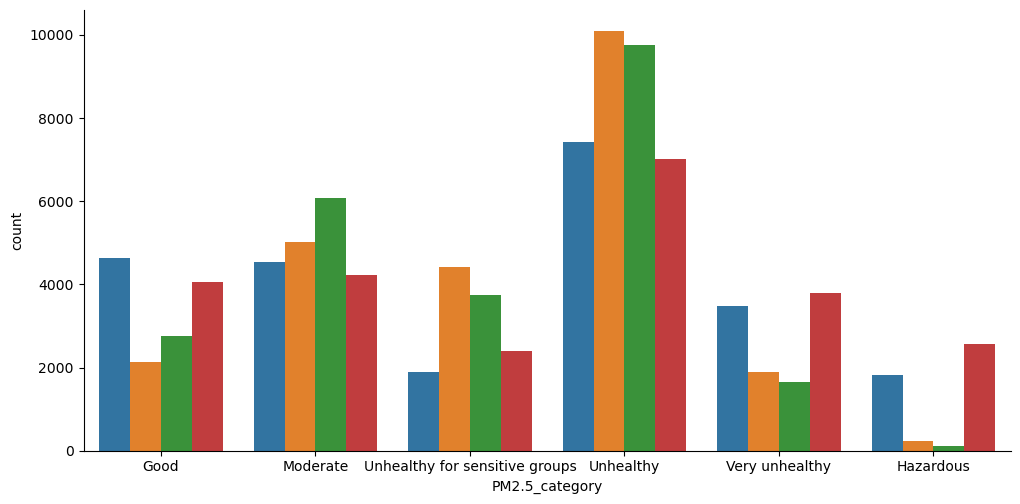

In [62]:
sns.catplot(data=Air_quality, x='PM2.5_category',kind='count', hue='quarter', aspect=2)

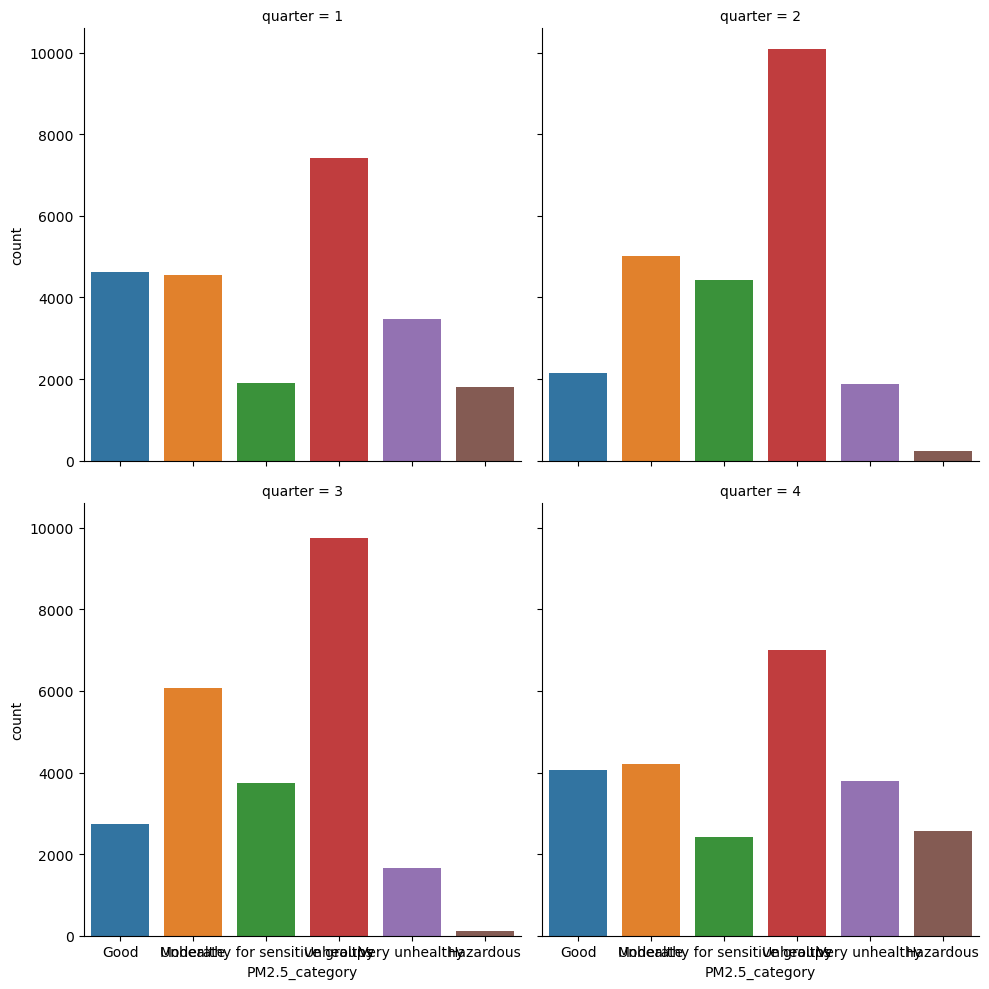

In [70]:
sns.catplot(data=Air_quality, x='PM2.5_category',kind='count', col='quarter',col_wrap=2, aspect=1)

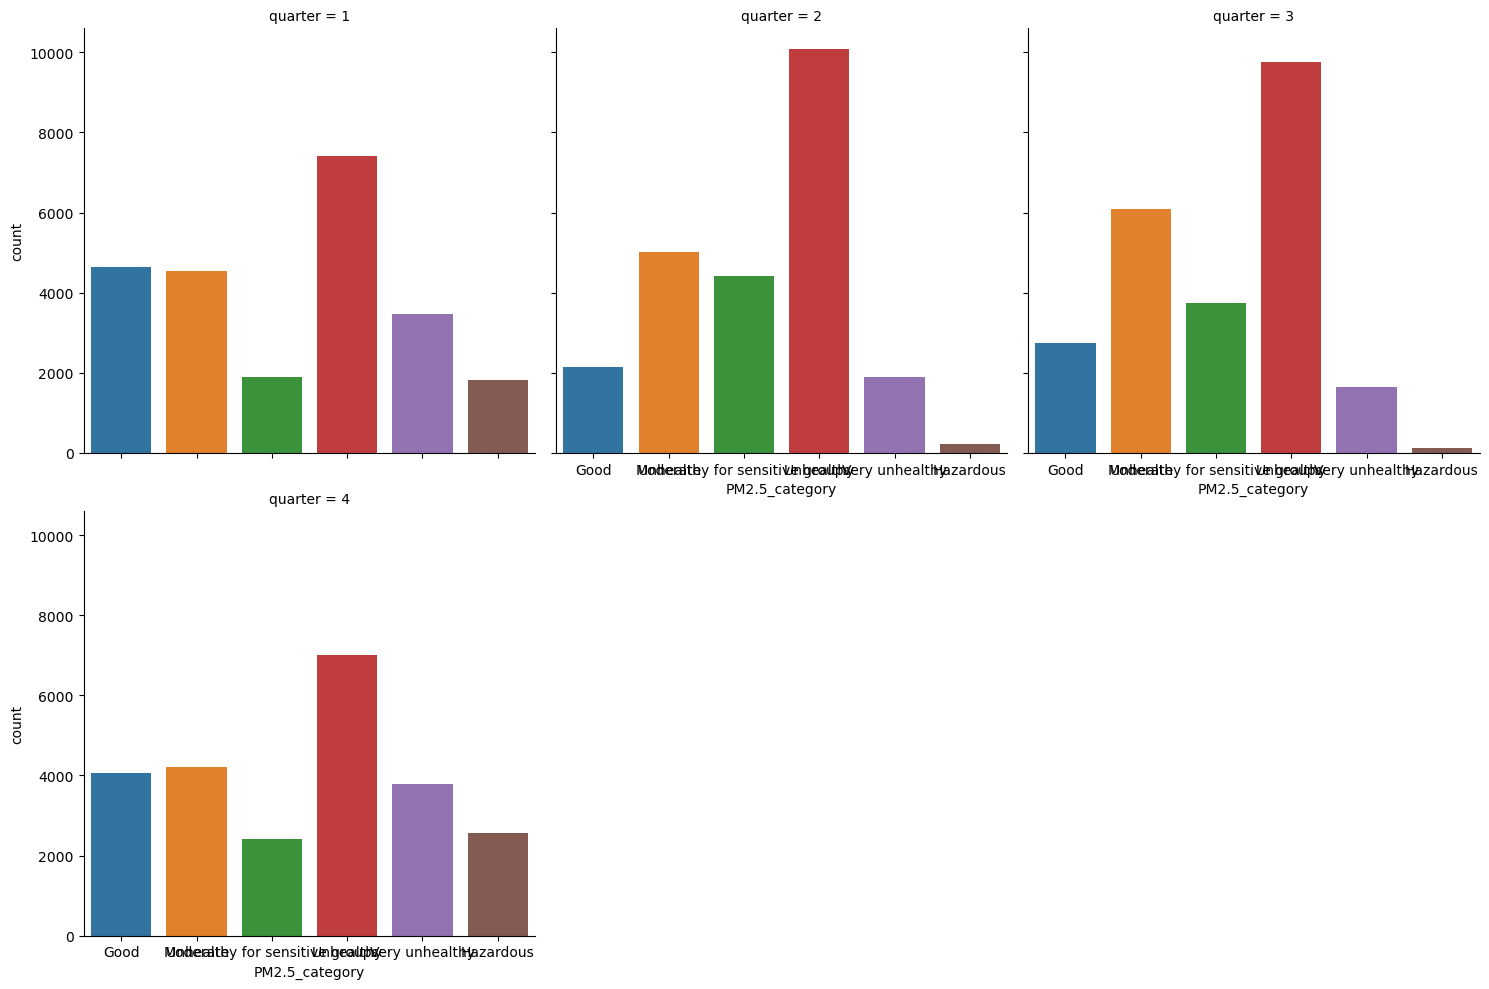

In [69]:
sns.catplot(data=Air_quality, x='PM2.5_category',kind='count', col='quarter',col_wrap=3, aspect=1)